Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [73]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [74]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [75]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [76]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/ColabNotebooks/CNN_assignment/Images/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/ColabNotebooks/CNN_assignment/Images/Test')

In [77]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [78]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [79]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,seed=123,image_size=(img_height,img_width), batch_size=batch_size,subset='training',validation_split=0.2)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [80]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,seed=123,image_size=(img_height,img_width), batch_size=batch_size,subset='validation',validation_split=0.2)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [81]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [82]:
print(train_ds.take(12))

<TakeDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

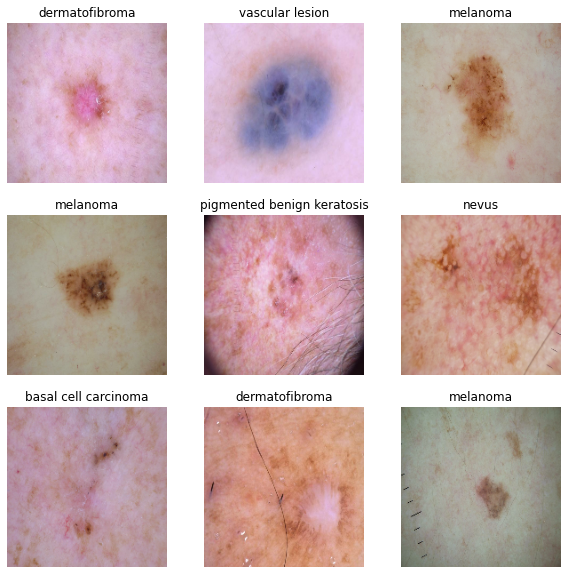

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [84]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [102]:
### Your code goes here
#Initializing input-shape and no. of classes:
input_shape = (180,180, 3)
num_classes = 10

model = tf.keras.Sequential([
  
  layers.Conv2D(32, 3, activation='relu',input_shape=input_shape,padding='same'),
  layers.Conv2D(32, 3, activation='relu',padding='same'),
  layers.MaxPooling2D(2),
  layers.Conv2D(64, 3, activation='relu',padding='same'),
  layers.Conv2D(64, 3, activation='relu',padding='same'),
  layers.MaxPooling2D(2),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

# View the summary of all layers
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 180, 180, 32)      896       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 180, 180, 32)      9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 90, 90, 64)        18496     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 90, 90, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 45, 45, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 129600)          

### Compile the model
Choose an appropirate optimiser and loss function for model training 

### Train the model

In [103]:
### Your code goes here
#Initializing input-shape and no. of classes:
input_shape = (180,180, 3)
num_classes = 10

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu',input_shape=input_shape,padding='same'),
  layers.Conv2D(32, 3, activation='relu',padding='same'),
  layers.MaxPooling2D(2),
  layers.Conv2D(64, 3, activation='relu',padding='same'),
  layers.Conv2D(64, 3, activation='relu',padding='same'),
  layers.MaxPooling2D(2),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  
  layers.Dense(num_classes,activation='softmax')
])



In [104]:
### Todo, choose an appropirate optimiser and loss function

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [105]:
history= model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
169/169 [==============================] - 50s 287ms/step - loss: 2.4300 - accuracy: 0.1918 - val_loss: 1.6710 - val_accuracy: 0.3601
Epoch 2/20
169/169 [==============================] - 49s 286ms/step - loss: 1.5805 - accuracy: 0.3990 - val_loss: 1.4133 - val_accuracy: 0.4655
Epoch 3/20
169/169 [==============================] - 50s 287ms/step - loss: 1.3767 - accuracy: 0.4825 - val_loss: 1.4234 - val_accuracy: 0.4944
Epoch 4/20
169/169 [==============================] - 49s 286ms/step - loss: 1.2407 - accuracy: 0.5464 - val_loss: 1.3260 - val_accuracy: 0.5382
Epoch 5/20
169/169 [==============================] - 49s 286ms/step - loss: 1.0782 - accuracy: 0.6030 - val_loss: 1.3584 - val_accuracy: 0.5620
Epoch 6/20
169/169 [==============================] - 49s 286ms/step - loss: 0.9434 - accuracy: 0.6601 - val_loss: 1.1489 - val_accuracy: 0.6058
Epoch 7/20
169/169 [==============================] - 50s 286ms/step - loss: 0.8265 - accuracy: 0.7061 - val_loss: 1.0242 - val_ac

### Visualizing training results

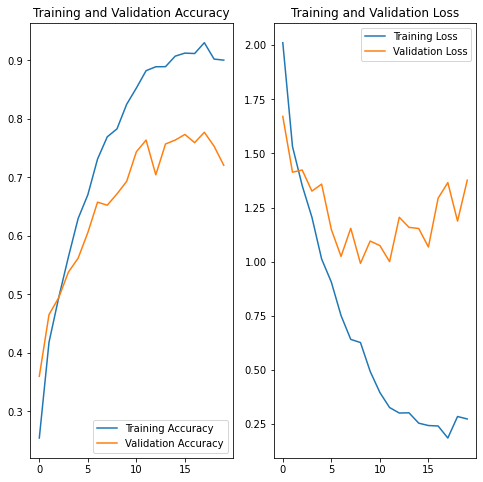

In [106]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=20
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

Observation: From the above accuracy graph, the diffference between Training and Validation accuaracy is high and says that model is overfit. Augumented statagy(RandomFlip and RandomRotation) is used with drop outs for the better bias- variance trade off.

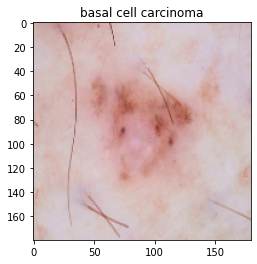

In [108]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
for images, labels in train_ds.take(1):
  for i in range(1):
    image = plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    


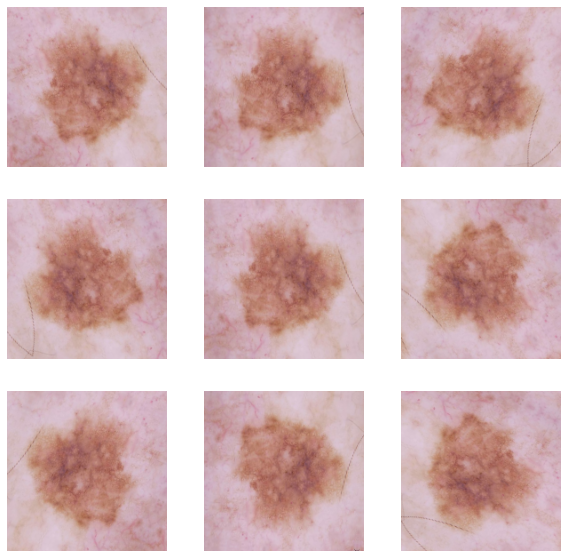

In [109]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),

  layers.experimental.preprocessing.RandomRotation(0.2),
])  

image = tf.expand_dims(images[1], 0)
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")


### Todo:
### Create the model, compile and train the model


In [110]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
### Your code goes here
#Initializing input-shape and no. of classes:
input_shape = (180,180, 3)
num_classes = 10

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu',input_shape=input_shape,padding='same'),
  layers.Conv2D(32, 3, activation='relu',padding='same'),
  layers.MaxPooling2D(2),
  layers.Dropout(0.20),
  layers.Conv2D(64, 3, activation='relu',padding='same'),
  layers.Conv2D(64, 3, activation='relu',padding='same'),
  layers.MaxPooling2D(2),
  layers.Dropout(0.20),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.50),
  layers.Dense(num_classes,activation='softmax')
])





### Compiling the model

In [111]:
## Your code goes here
### Todo, choose an appropirate optimiser and loss function

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

### Training the model

In [112]:
## Your code goes here, note: train your model for 20 epochs
epochs=20
history=model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
169/169 [==============================] - 51s 290ms/step - loss: 2.5621 - accuracy: 0.1324 - val_loss: 2.1264 - val_accuracy: 0.1611
Epoch 2/20
169/169 [==============================] - 50s 291ms/step - loss: 2.1519 - accuracy: 0.1885 - val_loss: 2.0204 - val_accuracy: 0.2546
Epoch 3/20
169/169 [==============================] - 50s 290ms/step - loss: 1.9982 - accuracy: 0.2402 - val_loss: 1.7039 - val_accuracy: 0.3675
Epoch 4/20
169/169 [==============================] - 50s 289ms/step - loss: 1.8457 - accuracy: 0.3157 - val_loss: 1.5757 - val_accuracy: 0.3935
Epoch 5/20
169/169 [==============================] - 50s 289ms/step - loss: 1.6983 - accuracy: 0.3515 - val_loss: 1.8518 - val_accuracy: 0.3177
Epoch 6/20
169/169 [==============================] - 50s 289ms/step - loss: 1.6871 - accuracy: 0.3623 - val_loss: 1.3998 - val_accuracy: 0.4491
Epoch 7/20
169/169 [==============================] - 50s 290ms/step - loss: 1.5717 - accuracy: 0.3987 - val_loss: 1.4340 - val_ac

### Visualizing the results

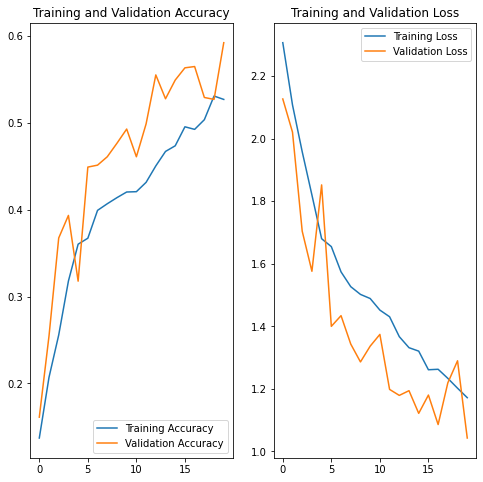

In [113]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Current model, after adding dropouts, is underfit as the training and validation Accuracy is par lower compared to previous model, need to use augumented statagy to maintain trade off.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

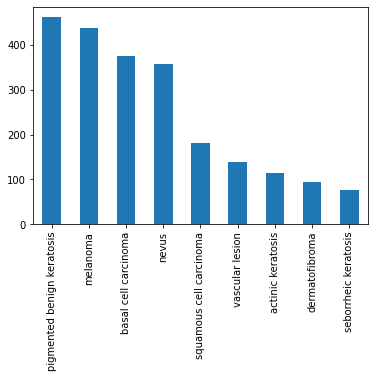

In [27]:
## Your code goes here.
import matplotlib.pyplot as plt

import glob
path_list = [x for x in glob.glob(os.path.join(data_dir_train,'*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob.glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dict = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
original_df['Label'].value_counts().plot(kind='bar')

### your code goes here, you can use training or validation data to visualize

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


Observation : Sebomheic keratosis has the meast number of samples.
And Pigmented benign keratosis and Melanoma are dominating classes among all samples and Clearly seen there is an data imbalance in the data as the clsses are dispropotionate.

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [44]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [45]:
path_to_training_dataset="/content/gdrive/MyDrive/ColabNotebooks/CNN_assignment/Images/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FAB5A068290>:   0%|          | 1/500 [00:00<01:12,  6.90 Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/ColabNotebooks/CNN_assignment/Images/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FABB4E422D0>: 100%|██████████| 500/500 [00:18<00:00, 27.09 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/ColabNotebooks/CNN_assignment/Images/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FAB50810990>: 100%|██████████| 500/500 [00:18<00:00, 27.06 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/ColabNotebooks/CNN_assignment/Images/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FAB5BC52D10>: 100%|██████████| 500/500 [00:18<00:00, 27.19 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/ColabNotebooks/CNN_assignment/Images/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x7FAB508E4910>: 100%|██████████| 500/500 [01:25<00:00,  5.86 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/ColabNotebooks/CNN_assignment/Images/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=796x682 at 0x7FAB50800350>: 100%|██████████| 500/500 [01:16<00:00,  6.50 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/ColabNotebooks/CNN_assignment/Images/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FAB509A9CD0>: 100%|██████████| 500/500 [00:18<00:00, 26.38 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/ColabNotebooks/CNN_assignment/Images/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FAB5BC52D10>: 100%|██████████| 500/500 [00:39<00:00, 12.74 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/ColabNotebooks/CNN_assignment/Images/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FAB50A66A90>: 100%|██████████| 500/500 [00:18<00:00, 26.90 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/ColabNotebooks/CNN_assignment/Images/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FAB5BBCE690>: 100%|██████████| 500/500 [00:19<00:00, 26.22 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [59]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [60]:
import glob
path_list = [x for x in glob.glob(os.path.join(data_dir_train,'*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob.glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dict = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])

In [61]:
import glob
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/gdrive/MyDrive/ColabNotebooks/CNN_assignment/Images/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029041.jpg_7af5a8c2-3cc5-4413-bad9-71f150ee4f57.jpg',
 '/content/gdrive/MyDrive/ColabNotebooks/CNN_assignment/Images/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028314.jpg_f55db6ac-7cc6-472a-ad06-db7f30ee8204.jpg',
 '/content/gdrive/MyDrive/ColabNotebooks/CNN_assignment/Images/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028076.jpg_9cc8b001-45b1-4094-90a8-ca7729a0759a.jpg',
 '/content/gdrive/MyDrive/ColabNotebooks/CNN_assignment/Images/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029500.jpg_79c0386e-e1e8-4be2-b61d-845453521cae.jpg',
 '/content/gdrive/MyDrive/ColabNotebooks/CNN_assignment/Images/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0033456.jpg_ea9c5c9c-d94e-4899-9074-92f6c95bd2ad.jpg',
 '/content/gdrive/MyDrive/ColabNotebooks/CNN_assignment/Images/Train/actinic keratosis/output/a

In [62]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [63]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [64]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

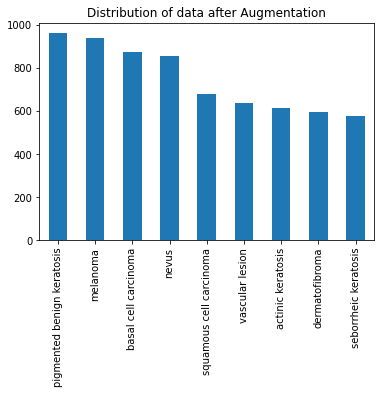

In [65]:
new_df['Label'].value_counts().plot(kind='bar')
plt.title('Distribution of data after Augmentation')
plt.show()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [114]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [115]:
data_dir_train="/content/gdrive/MyDrive/ColabNotebooks/CNN_assignment/Images/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [116]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [117]:

input_shape = (180,180, 3)
num_classes = 10

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu',input_shape=input_shape,padding='same'),
  layers.Conv2D(32, 3, activation='relu',padding='same'),
  layers.MaxPooling2D(2),
  layers.Dropout(0.20),
  layers.Conv2D(64, 3, activation='relu',padding='same'),
  layers.Conv2D(64, 3, activation='relu',padding='same'),
  layers.MaxPooling2D(2),
  layers.Dropout(0.20),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.50),
  layers.Dense(num_classes,activation='softmax')
])






#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [118]:
### Todo, choose an appropirate optimiser and loss function

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

#### **Todo:**  Train your model

In [119]:
epochs = 30
## Your code goes here, use 50 epochs.

history=model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 51s 290ms/step - loss: 2.6637 - accuracy: 0.1290 - val_loss: 2.2486 - val_accuracy: 0.1403
Epoch 2/30
169/169 [==============================] - 50s 290ms/step - loss: 2.2259 - accuracy: 0.1303 - val_loss: 2.2066 - val_accuracy: 0.1492
Epoch 3/30
169/169 [==============================] - 50s 289ms/step - loss: 2.1695 - accuracy: 0.1550 - val_loss: 2.1088 - val_accuracy: 0.1990
Epoch 4/30
169/169 [==============================] - 50s 290ms/step - loss: 2.0145 - accuracy: 0.2227 - val_loss: 2.0576 - val_accuracy: 0.2197
Epoch 5/30
169/169 [==============================] - 50s 289ms/step - loss: 1.9837 - accuracy: 0.2348 - val_loss: 1.8030 - val_accuracy: 0.3096
Epoch 6/30
169/169 [==============================] - 50s 290ms/step - loss: 1.8092 - accuracy: 0.2806 - val_loss: 1.7158 - val_accuracy: 0.3177
Epoch 7/30
169/169 [==============================] - 50s 289ms/step - loss: 1.7649 - accuracy: 0.3078 - val_loss: 1.6787 - val_ac

#### **Todo:**  Visualize the model results

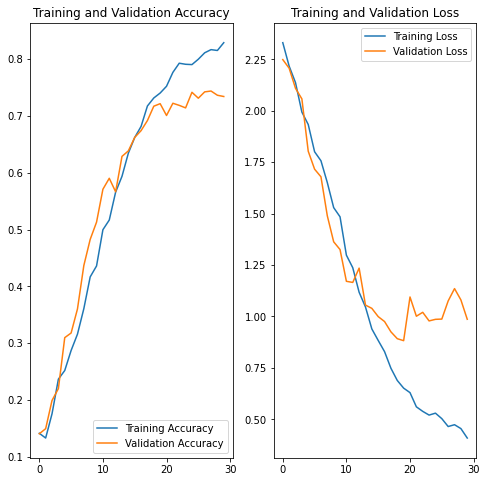

In [120]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



After the overfitting model 1 and underfitting model 2, we have got the appreciatable training and validation accuracies, Class imbalance and Data augumentaion is really helpful while training the model.